In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

> 파일을 읽어줍니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/3) 교육팀/12기 에듀세션/** 12기 퀘스트 제출 **/세션 9 퀘스트 제출/team1 data/train_extra_columns.csv' # 체크) train_extra_columns 데이터셋에 대한 설명 필요할 듯
path2 = '/content/drive/MyDrive/3) 교육팀/12기 에듀세션/세션 9 메인 팀플 퀘스트/data/test.csv'

train = pd.read_csv(path1)
test = pd.read_csv(path2)

In [ ]:
train.shape

(103976, 15)

In [ ]:
test.shape

(25995, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103976 entries, 0 to 103975
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                103925 non-null  object 
 1   description            103976 non-null  object 
 2   designation            73967 non-null   object 
 3   price                  96781 non-null   float64
 4   province               103925 non-null  object 
 5   region_1               86954 non-null   object 
 6   region_2               40408 non-null   object 
 7   taster_name            83005 non-null   object 
 8   taster_twitter_handle  78994 non-null   object 
 9   title                  103976 non-null  object 
 10  variety                103975 non-null  object 
 11  winery                 103976 non-null  object 
 12  points                 103976 non-null  int64  
 13  good_numbers           103976 non-null  int64  
 14  nan_count              103976 non-nu

In [ ]:
train.head()

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points,good_numbers,nan_count
0,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,5.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83,3,2
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,NaN,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85,4,1
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86,0,1
3,US,This is the winery's best Nebula in years. Whi...,Nebula,29.0,California,Paso Robles,Central Coast,NaN,NaN,Midnight 2010 Nebula Cabernet Sauvignon (Paso ...,Cabernet Sauvignon,Midnight,87,3,2
4,US,This is a very rich Pinot whose primary virtue...,Wiley Vineyard,40.0,California,Anderson Valley,NaN,NaN,NaN,Harrington 2006 Wiley Vineyard Pinot Noir (And...,Pinot Noir,Harrington,88,3,3


In [ ]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(train)

,Missing Values,% Value
region_2,63568,61
designation,30009,28
taster_twitter_handle,24982,24
taster_name,20971,20
region_1,17022,16
price,7195,6
country,51,0
province,51,0
variety,1,0
description,0,0


In [ ]:
# 컬럼별 데이터 종류(카테고리) 수. 범주형 변수가 많아 카테고리의 개수를 파악해 봄
pd.DataFrame([len(train[i].unique()) for i in train.columns], index=train.columns, columns=['unique count'])

,unique count
country,44
description,97550
designation,32962
price,369
province,408
region_1,1189
region_2,18
taster_name,20
taster_twitter_handle,16
title,96761


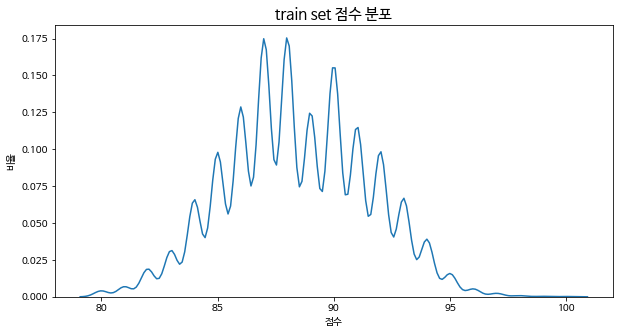

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(train.points)
plt.xlabel('점수')
plt.ylabel('비율')
plt.title('train set 점수 분포',fontsize=15)
plt.show()

### taster, price EDA

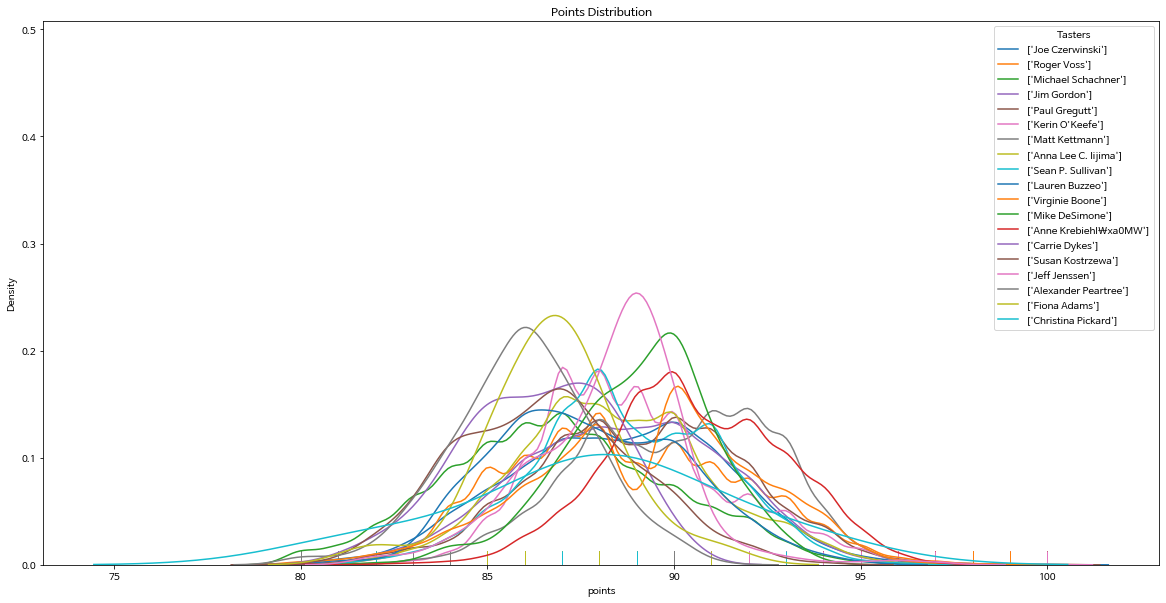

In [ ]:
targets = [train.loc[train['taster_name'] == val] for val in train['taster_name'].unique()]
plt.figure(figsize=(20,10))
for target in targets:
    sns.distplot(target['points'], hist=False, rug=True, label=target['taster_name'].unique())
plt.title('Points Distribution')
plt.legend(title='Tasters')
plt.show()

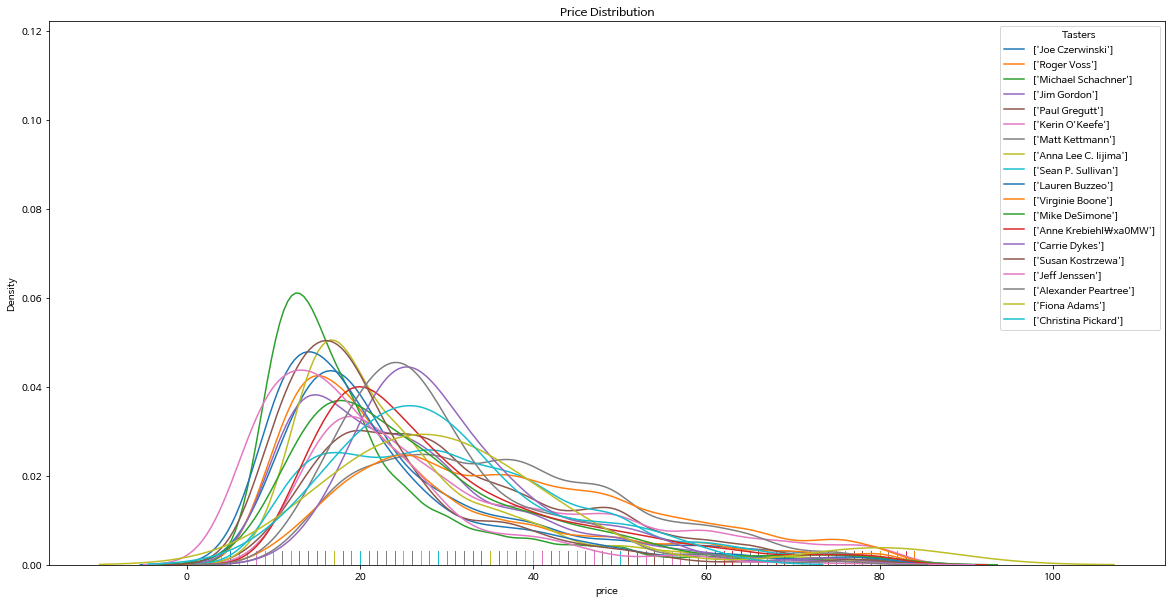

In [ ]:
train_cut = train[train.price < train.price.quantile(0.95)]
targets = [train_cut.loc[train_cut['taster_name'] == val] for val in train_cut['taster_name'].unique()]
plt.figure(figsize=(20,10))
for target in targets:
  sns.distplot(target['price'], hist=False, rug=True, label=target['taster_name'].unique())
plt.title('Price Distribution')
plt.legend(title='Tasters')
plt.show()

Skewness: 19.114
Kurtosis: 883.273
---------------------------
count    96781.000000
mean        35.437410
std         42.425377
min          4.000000
25%         17.000000
50%         25.000000
75%         42.000000
max       3300.000000
Name: price, dtype: float64
---------------------------


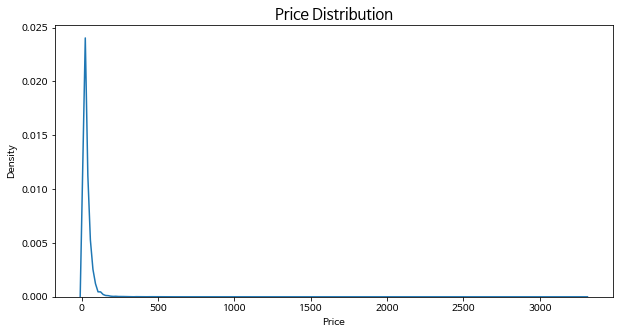

In [ ]:
td = train.price
print("Skewness: %.3f" % td.skew())  # Skewness
print("Kurtosis: %.3f" % td.kurt())  # Kurtosis
print('---------------------------')
print(td.describe())
print('---------------------------')
plt.figure(figsize=(10,5))
sns.kdeplot(td)
plt.xlabel('Price')
plt.title('Price Distribution',fontsize=15)
plt.show()

Skewness: 1.038
Kurtosis: 0.413
---------------------------
count    91845.000000
mean        29.578573
std         16.809548
min          4.000000
25%         17.000000
50%         25.000000
75%         40.000000
max         84.000000
Name: price, dtype: float64
---------------------------


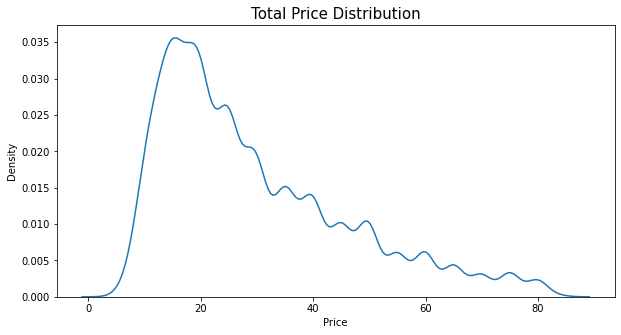

In [ ]:
td = train.price
td_cut = td[td < td.quantile(0.95)]
print("Skewness: %.3f" % td_cut.skew())  # Skewness
print("Kurtosis: %.3f" % td_cut.kurt())  # Kurtosis
print('---------------------------')
print(td_cut.describe())
print('---------------------------')
plt.figure(figsize=(10,5))
sns.kdeplot(td_cut)
plt.xlabel('Price')
plt.title('Total Price Distribution',fontsize=15)
plt.show()

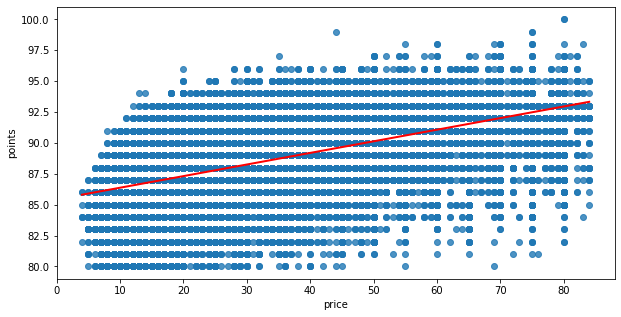

          points     price
points  1.000000  0.541189
price   0.541189  1.000000


In [ ]:
td = train.price
train_cut = train[td < td.quantile(0.95)]

plt.figure(figsize=(10,5))
sns.regplot(data=train_cut, x='price', y='points', 
            line_kws={"color":"red", "lw":2})
plt.xlabel('price') 
plt.ylabel('points') 
plt.show()

pearson_corr = train_cut[['points','price']].corr(method='pearson')
print(pearson_corr)

### Country, Province, Region EDA

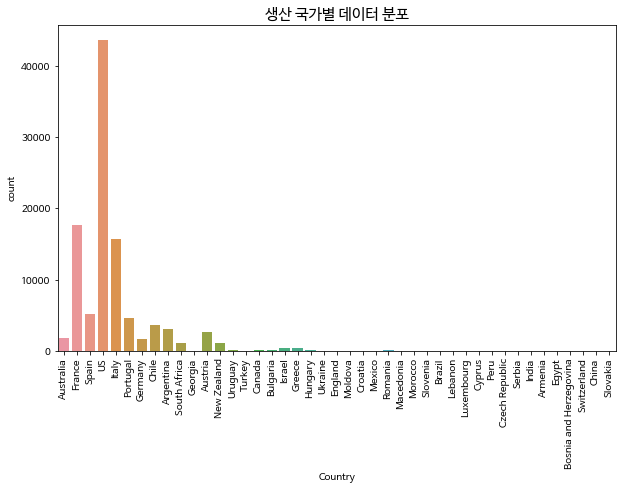

In [ ]:
plt.figure(figsize=(10,6))
cnt = sns.countplot(x='country', data=train) 
cnt.set_xlabel("Country")
cnt.set_ylabel("count")
plt.xticks(rotation=90) 
plt.title('생산 국가별 데이터 분포',fontsize=15)
plt.show()

In [ ]:
# 개수를 표로 나타내기
count = train.groupby("country")['country'].count()
countdf = pd.DataFrame(count.values, columns=['country_count'])
countdf['country'] = count.index
countdf.sort_values(by='country_count').tail(10)

,country_count,country
17,1755,Germany
2,1859,Australia
3,2654,Austria
0,3037,Argentina
8,3589,Chile
31,4593,Portugal
37,5221,Spain
22,15659,Italy
15,17749,France
40,43578,US


#### "region"이라는 새로운 변수 지정
##### 특정 국가에서 발생빈도수가 과도하게 높으므로, 데이터 빈도가 너무 높은 지역은 상세 지역(province, region_1 이용)별로 쪼개어서 생산지역(region)으로 정의하고, 그외는 국가 자체를 생산지역으로 정의함
이를 위해 국가별로 count 값을 새로운 컬럼으로 지정한 후, count가 1만개 이상인 것과 그렇지 않은 국가들을 분리하여 ,각각 province와 country 정보를 region 컬럼에 데이터로 넣어줌.

In [ ]:
train = pd.merge(train, countdf, how='left', on='country')

In [ ]:
freq_country = train[train['country_count'] > 10000]
country_enough = train[train['country_count'] <= 10000]

freq_country['region'] = freq_country['province']
country_enough['region'] = country_enough['country']

train_province = pd.concat([freq_country, country_enough])

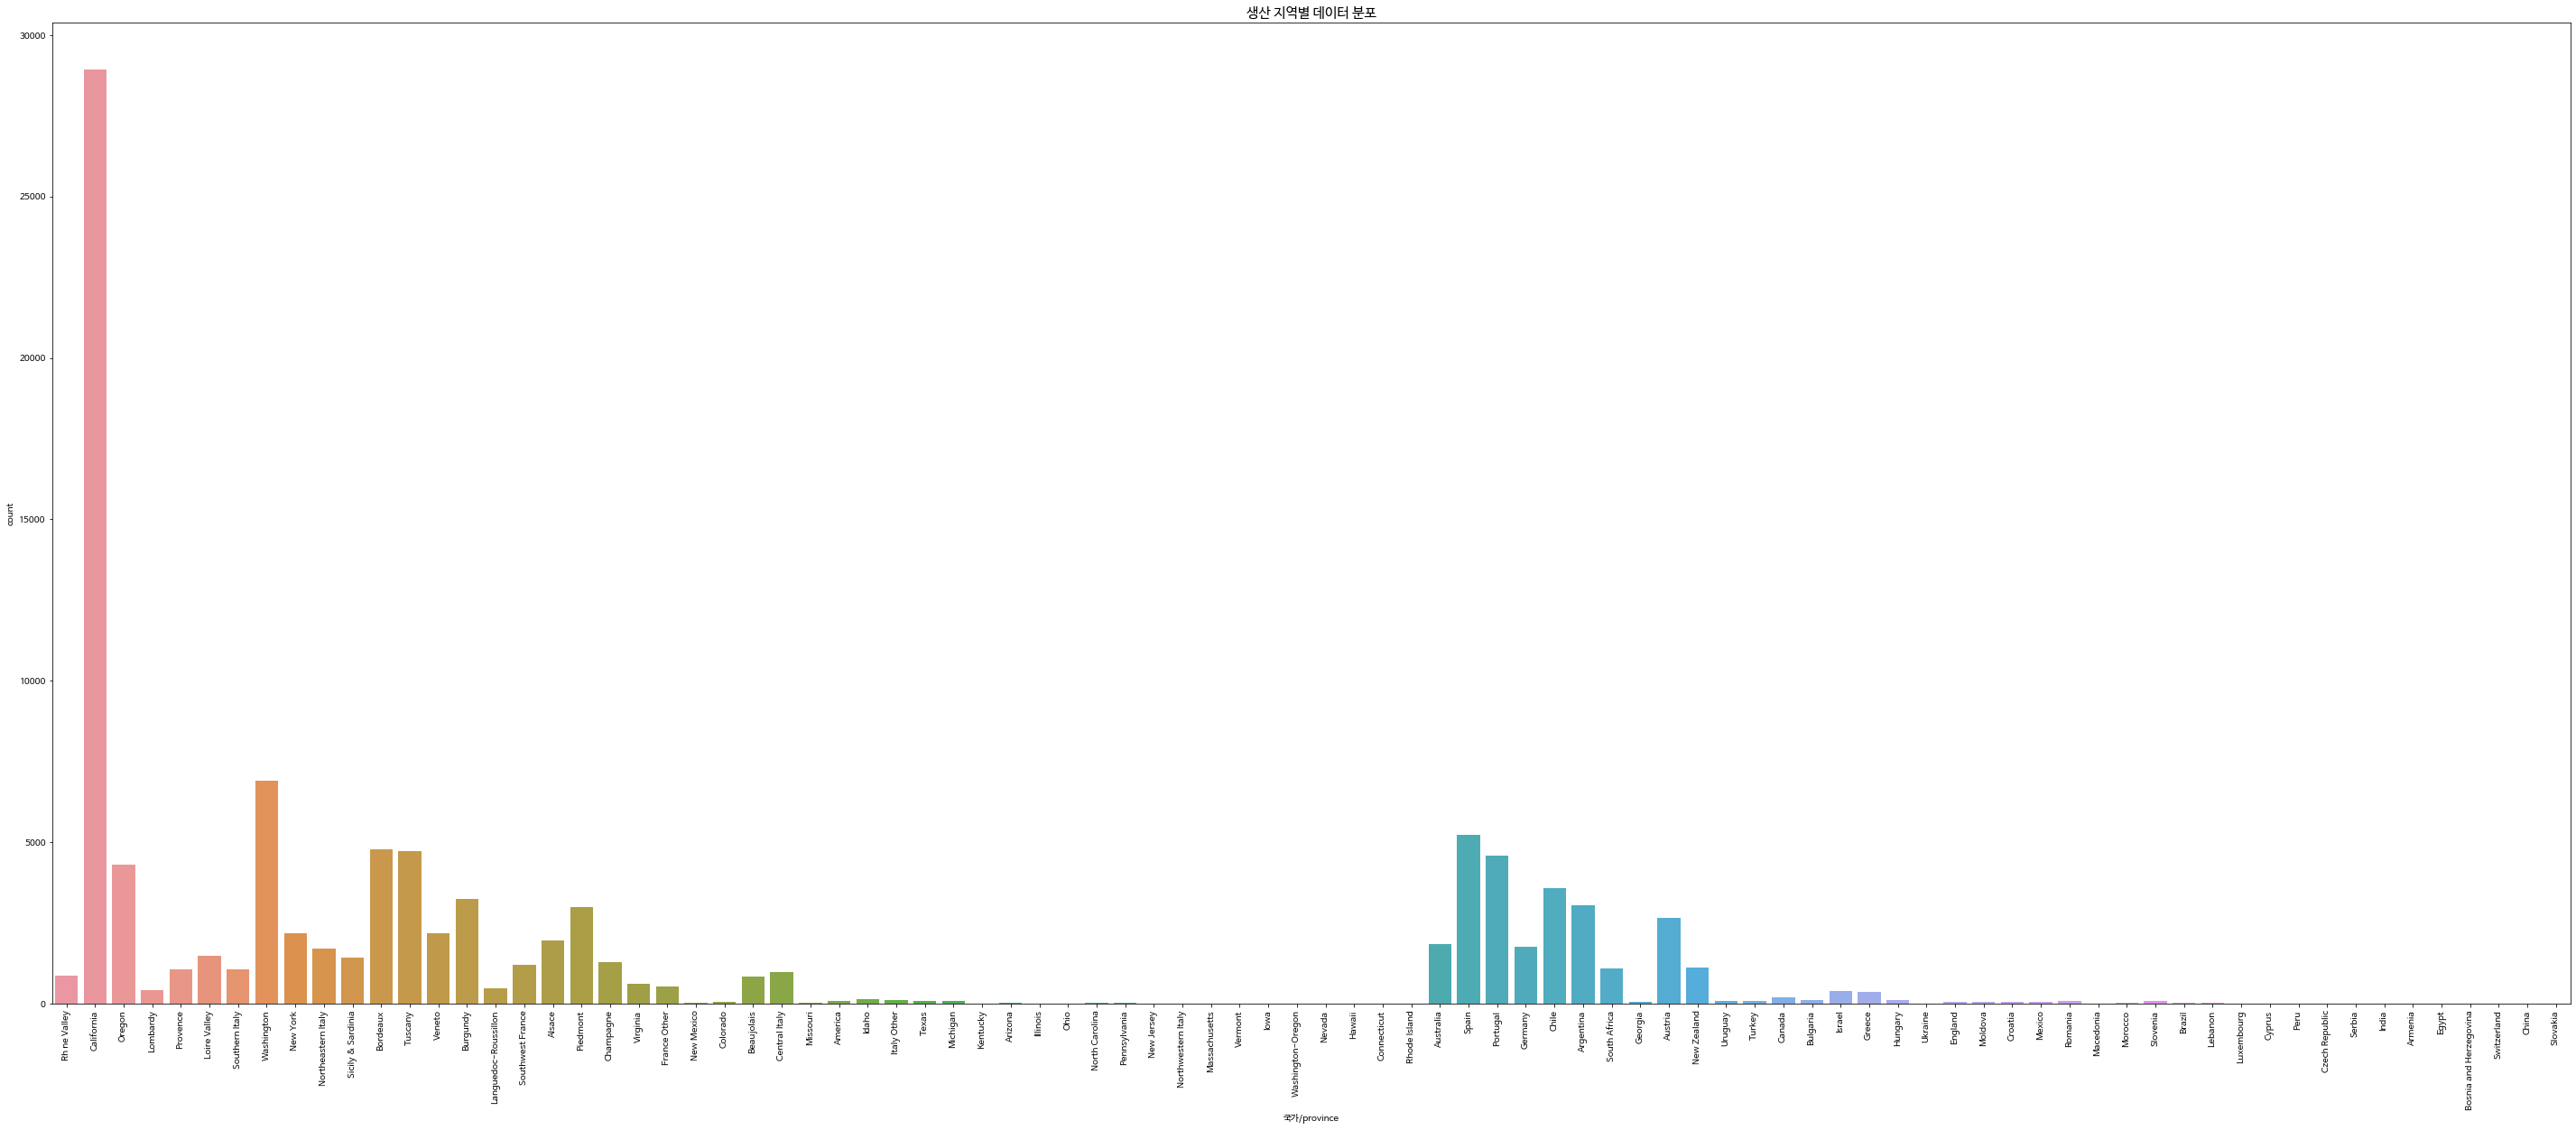

In [ ]:
plt.figure(figsize=(50,20))
cnt = sns.countplot(x='region', data=train_province) 
cnt.set_xlabel("국가/province")
cnt.set_ylabel("count")
plt.xticks(rotation=90) 
plt.title('생산 지역별 데이터 분포',fontsize=15)
plt.show()

여전히 특정 지역에서 1만개 이상의 빈도를 가지므로 한번 더 빈도 수를 표 형태로 출력

In [ ]:
reg_cnt = train_province.groupby("region")['region'].count()
reg_cnt
reg_cnt_df = pd.DataFrame(reg_cnt.values, columns=['reg_count'])
reg_cnt_df['region'] = reg_cnt.index

reg_cnt_df.sort_values(by='reg_count').tail()

,reg_count,region
80,4729,Tuscany
8,4776,Bordeaux
76,5221,Spain
86,6916,Washington
13,28941,California


캘리포니아에서 유독 높은 빈도를 가지므로, 캘리포니아만 따로 추출해서 region 변수의 데이터를 region_1의 값으로 추가적으로 세분화 해줌.

In [ ]:
cal = train_province[train_province['region'] == 'California']
not_cal = train_province[train_province['region'] != 'California']

cal_cnt = cal.groupby("region_1")['region_1'].count()
cal_cnt_df = pd.DataFrame(cal_cnt.values, columns=['cal_reg_count'])
cal_cnt_df['region_1'] = cal_cnt.index
cal_cnt_df.sort_values(by='cal_reg_count').tail()

cal['region'] = cal['region_1']

train_region= pd.concat([cal, not_cal])

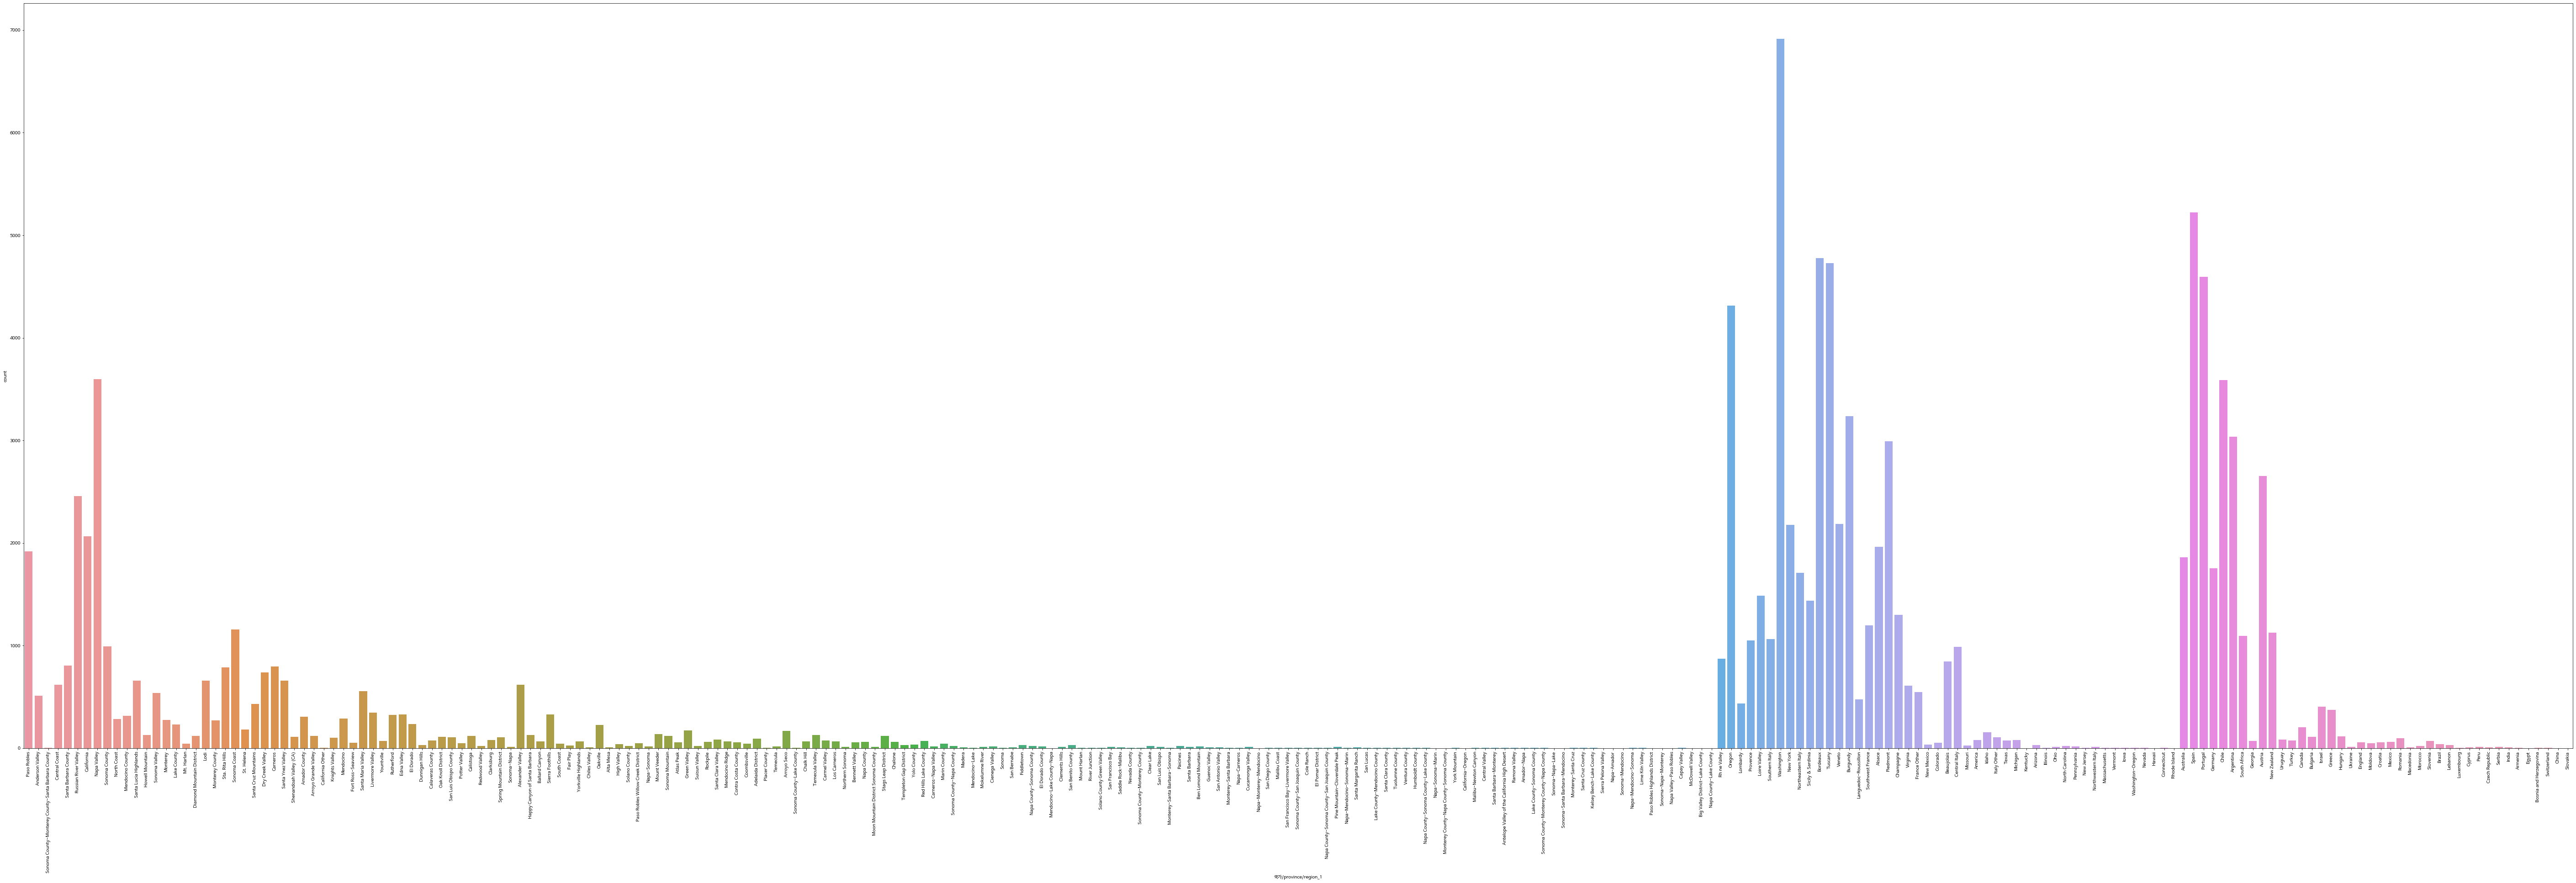

In [ ]:
plt.figure(figsize=(100,30))
cnt = sns.countplot(x='region', data=train_region) 
cnt.set_xlabel("국가/province/region_1")
cnt.set_ylabel("count")
plt.xticks(rotation=90) 
plt.show()

# 각 범주가 가지는 데이터가 1만개 이내가 되도록 새롭게 "생산지역" 변수 지정 완료.

#### 새롭게 정의한 region 변수를 사용하는 것과 그냥 country를 사용하는 것 중 더 나은 feature를 파악하기

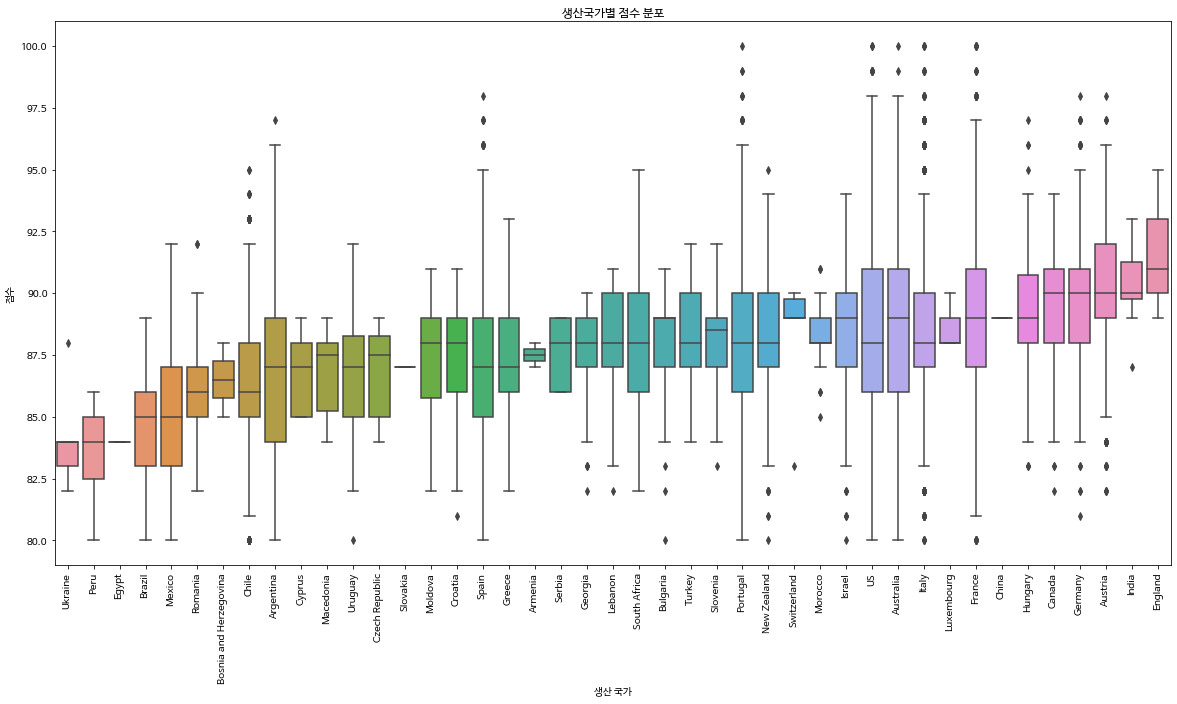

In [ ]:
#시각화

plt.figure(figsize=(20,10))
box = sns.boxplot(x='country', y='points', data=train, 
                  order=train.groupby("country")['points'].mean().sort_values().index)
box.set_ylabel("점수")
box.set_xlabel("생산 국가")
plt.xticks(rotation=90) 
plt.title("생산국가별 점수 분포")
plt.show()

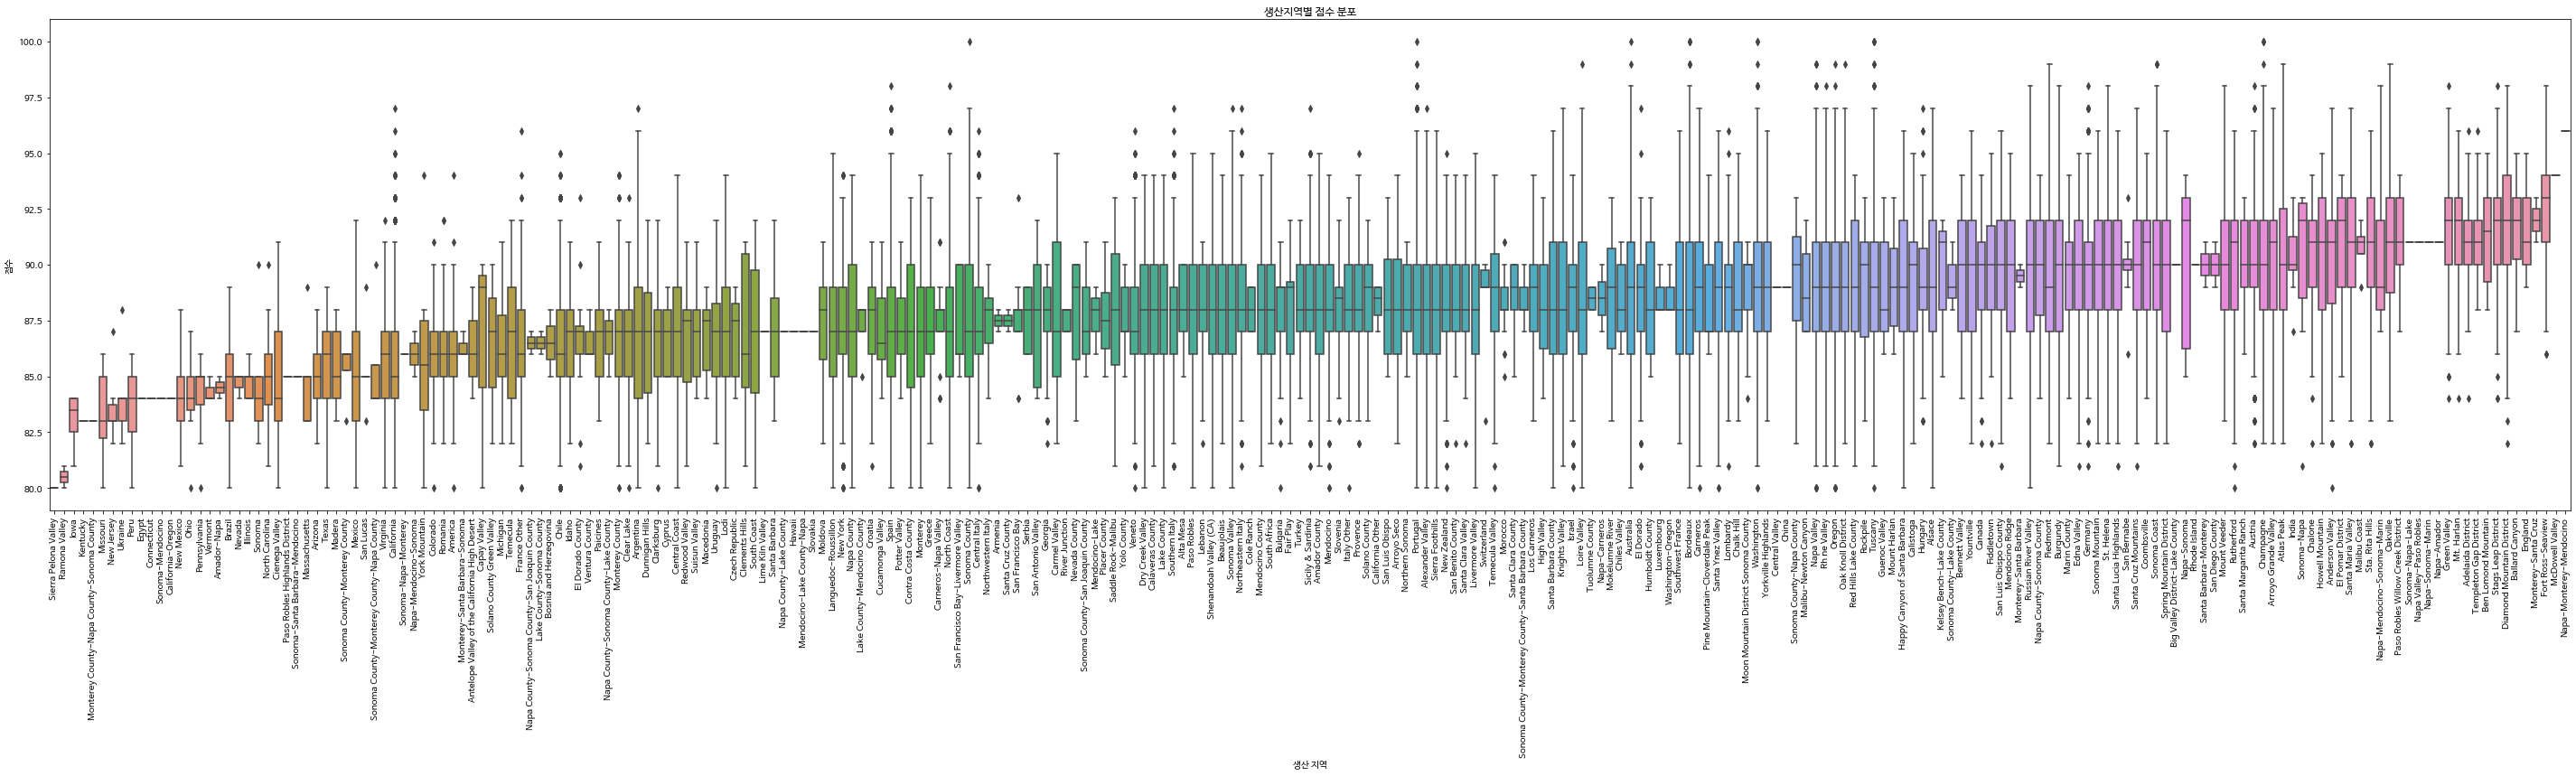

In [ ]:
plt.figure(figsize=(50,10))
box = sns.boxplot(x='region', y='points', data=train_region,
                 order=train_region.groupby("region")['points'].mean().sort_values().index)
box.set_ylabel("점수")
box.set_xlabel("생산 지역")
plt.xticks(rotation=90) 
plt.title("생산지역별 점수 분포")
plt.show()

간단한 모델 예측을 통해 결정계수 값을 보고 feature 선택

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

lr = LinearRegression()
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# 범주형 변수 country 원핫인코딩
OH_country = pd.DataFrame(OH_encoder.fit_transform(train['country'].array.reshape(-1,1)))
OH_country.index = train.index
OH_country.columns = OH_encoder.get_feature_names(['country'])

# 범주형 변수 region 원핫인코딩
OH_region = pd.DataFrame(OH_encoder.fit_transform(train_region['region'].array.reshape(-1,1)))
OH_region.index = train_region.index
OH_region.columns = OH_encoder.get_feature_names(['region'])

In [ ]:
# country로 예측한 결과
X_train, X_valid, y_train, y_valid = train_test_split(OH_country, train.points, train_size=0.8, test_size=0.2, random_state=42)

lr.fit(X_train, y_train)
valid_preds = lr.predict(X_valid)
print('R_2 score: {}'.format(r2_score(y_valid, valid_preds)))

R_2 score: 0.050188638520930806


In [ ]:
# region으로 예측한 결과
X_train, X_valid, y_train, y_valid = train_test_split(OH_region, train_region.points, train_size=0.8, test_size=0.2, random_state=42)

lr.fit(X_train, y_train)
valid_preds = lr.predict(X_valid)
print('R_2 score: {}'.format(r2_score(y_valid, valid_preds)))

R_2 score: -3.93327627646265e+22


### Description EDA

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# GPU 설정 필요 
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("jhgan/ko-sroberta-multitask", device="cuda")

In [ ]:
#train['descript_embedd'] = train.apply(lambda x: sentence_model.encode(x.description), axis=1)
# 학습시키는데 약 26분 소요됨. 그래서 발표에서는 미리 저장해놓은 최종 형태 데이터를 불러올 예정

# 임베딩된 벡터들의 각 원소를 쪼개서 데이터프레임화 하기. 마찬가지로 시간이 꽤 소요되어, 미리 저장해놓은 데이터프레임을 불러올 것
# embedding_col = pd.DataFrame([train['descript_embedd'][i] for i in range(len(train))])
# embedding_col.index = train.index

embedding_col = pd.read_csv('/content/drive/MyDrive/3) 교육팀/12기 에듀세션/** 12기 퀘스트 제출 **/세션 9 퀘스트 제출/team1 data/embedding dataframe.csv', index_col = 0)
embedding_col.index = train.index

In [ ]:
# description의 설명력 확인
X_train, X_valid, y_train, y_valid = train_test_split(embedding_col, train.points, train_size=0.8, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
valid_preds = lr.predict(X_valid)
print('R_2 score: {}'.format(r2_score(y_valid, valid_preds)))

R_2 score: 0.5422289232334363


In [ ]:
# description의 길이를 새로운 변수 length로 정의하여 해당 변수로도 유의미한 예측이 가능한지 확인
train['length'] = pd.DataFrame([len(train['description'][i]) for i in range(len(train))])

X_train, X_valid, y_train, y_valid = train_test_split(train.length, train.points, train_size=0.8, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train.array.reshape(-1,1), y_train)
valid_preds = lr.predict(X_valid.array.reshape(-1,1))
print('R_2 score: {}'.format(r2_score(y_valid, valid_preds)))

R_2 score: 0.31624477456362043


In [ ]:
# 다른 범주형 변수와 결합하여 모델링 해도 문제 없는지 확인하기 위해 Taster 변수 추가

x_EDA = train.copy()
# 결측치처리
x_EDA['taster_name'] = x_EDA['taster_name'].fillna('None')
embedding_col = embedding_col.fillna(0)

OH_taster = pd.DataFrame(OH_encoder.fit_transform(x_EDA['taster_name'].array.reshape(-1,1)))
OH_taster.index = x_EDA.index
OH_taster.columns = OH_encoder.get_feature_names(['taster_name'])

preprocessed_x_EDA = pd.concat([OH_taster, embedding_col], axis=1)

In [ ]:
# embedding된 벡터들을 데이터프레임화 하여 범주형 변수인 Taster와 결합해서 linear model 돌려도 모델의 설명력에 문제 없음.
X_train, X_valid, y_train, y_valid = train_test_split(preprocessed_x_EDA, train.points, train_size=0.8, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
valid_preds = lr.predict(X_valid)
print('R_2 score: {}'.format(r2_score(y_valid, valid_preds)))

R_2 score: 0.5769011099271582


## designation EDA

In [ ]:
train['designation'].nunique()

32961

In [ ]:
top_list_d = train['designation'].value_counts().nlargest(30).index
df_top_d = train[train['designation'].isin(top_list_d)]

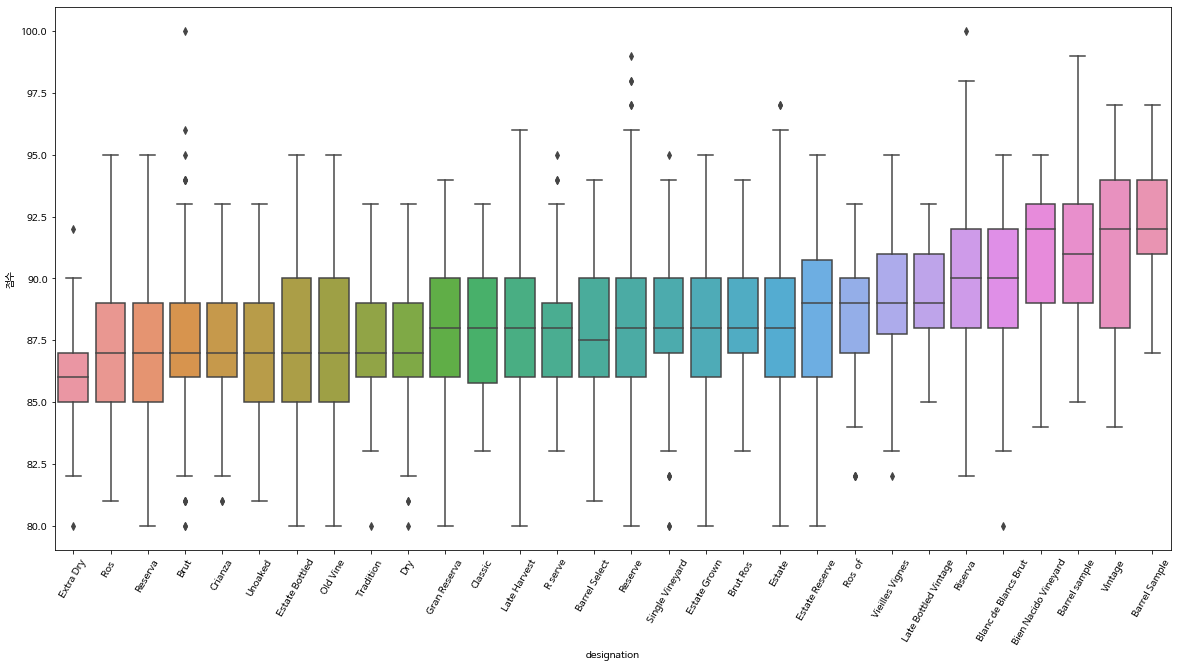

In [ ]:
plt.figure(figsize=(20,10))
box = sns.boxplot(x='designation', y='points', data=df_top_d,
                  order=df_top_d.groupby("designation")['points'].mean().sort_values().index)
box.set_ylabel("점수")
box.set_xlabel("designation")
plt.xticks(rotation=60) 
plt.show()

# title -> 생산년도(year) EDA

In [ ]:
import re #숫자만 추출

def year(row):
    numbers = re.findall("\d+", row['title'])
    a = 0
    
    if len(numbers) >= 1:
        for num in numbers:
            if (len(num) == 4) and (num not in row['designation']) and (num not in row['winery']):
                a = int(num)
                

    else:
        a = 0

    return a

In [ ]:
train['designation'] = train['designation'].fillna('None')
train['winery'] = train['winery'].fillna('None')
train['year'] = train.apply(year, axis=1)

In [ ]:
train.year.nunique()

34

In [ ]:
train[train['year']== 0].shape

(3195, 787)

In [ ]:
df_elim = train[train['year']!= 0]
df_elim = df_elim[(df_elim['year'] > 1970)]
df_elim = df_elim.astype({'year': 'int'})

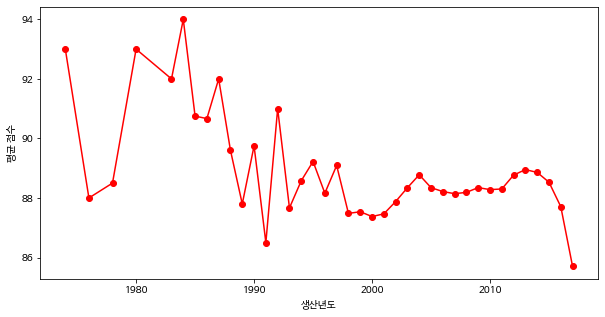

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_elim.groupby(['year']).points.mean(), marker='o', c='r') # marker: 마커의 모양, c = 라인 색상
plt.xlabel('생산년도')
plt.ylabel('평균 점수')
plt.show()

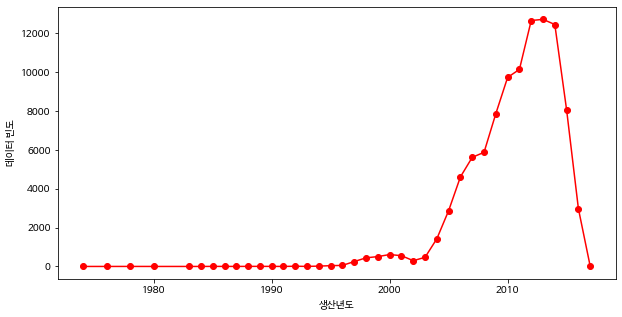

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_elim.groupby(['year']).points.count(), marker='o', c='r') # marker: 마커의 모양, c = 라인 색상
plt.xlabel('생산년도')
plt.ylabel('데이터 빈도')
plt.show()

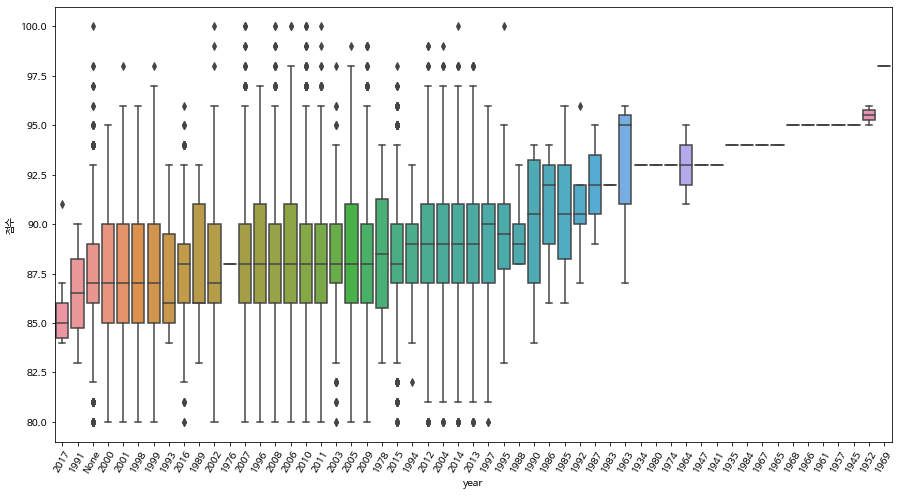

In [ ]:
plt.figure(figsize=(15,8))
box = sns.boxplot(x='year', y='points', data=train,
                  order=train.groupby("year")['points'].mean().sort_values().index)
box.set_xlabel("year")
box.set_ylabel("점수")
plt.xticks(rotation=60) 
plt.show()

# EDA 활용 (taster)

두가지 활용 가능성:

1. 와인제조업자 -> 어떤 taster에게 평가를 받아야 하는가? <br>
   a. 평균적인 분포 <br>
   b. 와인 특성 고려 (지역, 품종, description -> 각 taster의 성향) <br>
   c. 20개의 모델 (taster 별 예상 점수) 

2. 와인 추천시스템
  데이터가 존재한다면(ex: wine.com) <br>소비자 별 예상점수 도출 가능 ->
  즉 고객의 반응을 예측할 수 있다.
   

### 모델링을 위한 최종 데이터 전처리

In [ ]:
# 이상치 제거
train = pd.concat([train, embedding_col], axis=1)
train = train[train['price'] < train.price.quantile(0.95) ]
train

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,...,758,759,760,761,762,763,764,765,766,767
0,Australia,"Possibly a little sweet, this is a soft, easyg...",None,5.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,...,0.667978,0.259622,0.075212,-0.180045,-0.098275,-0.488673,-0.106117,0.457583,0.057087,-0.178114
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,NaN,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,...,0.984952,-0.051242,-0.111034,-0.367381,0.351128,-0.031196,-0.209380,0.300452,0.295949,-0.268851
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,...,0.862671,-0.170502,0.105146,-0.057006,0.064956,-0.024876,0.320966,0.465301,0.137146,-0.298947
3,US,This is the winery's best Nebula in years. Whi...,Nebula,29.0,California,Paso Robles,Central Coast,NaN,NaN,Midnight 2010 Nebula Cabernet Sauvignon (Paso ...,...,0.674787,0.037915,0.137209,-0.358985,0.372515,-0.390448,-0.360666,0.137261,0.211729,0.079812
4,US,This is a very rich Pinot whose primary virtue...,Wiley Vineyard,40.0,California,Anderson Valley,NaN,NaN,NaN,Harrington 2006 Wiley Vineyard Pinot Noir (And...,...,0.953633,-0.100434,0.036160,-0.316608,0.172650,-0.202147,0.108061,0.413253,0.213324,0.072738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103971,New Zealand,"This is a fresh, fruit-driven rendering of Pin...",Fox By John Belsham,24.0,Marlborough,NaN,NaN,Joe Czerwinski,@JoeCz,Foxes Island 2014 Fox By John Belsham Pinot No...,...,0.568038,0.059688,0.306006,-0.265849,-0.009777,-0.420283,-0.064088,0.413705,0.371495,0.033947
103972,US,"A touch of oak adds a sweet, smoky creaminess ...",Charlotte's Home Estate,17.0,California,Northern Sonoma,Sonoma,NaN,NaN,Rodney Strong 2012 Charlotte's Home Estate Sau...,...,0.821733,-0.170445,-0.177814,-0.308363,0.411239,-0.286192,0.115185,0.443512,0.109359,0.119350
103973,US,"This is Bacchus vineyard fruit, as per normal ...",None,11.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Arbor Crest 2006 Sauvignon Blanc (Columbia Val...,...,0.521736,-0.200294,-0.058830,-0.335048,0.391019,-0.153108,0.311332,0.278432,0.195662,-0.262820
103974,Italy,"This blend of Merlot, Cabernet Sauvignon and P...",Bulizio,36.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Le Palaie 2009 Bulizio Red (Toscana),...,0.138370,-0.140459,0.023528,-0.214509,-0.133374,-0.441827,0.274140,0.349448,0.051679,0.371259


In [ ]:
X = train.copy()
y = X['points']
X.columns

Index(['country', 'description', 'designation', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       ...
       '758', '759', '760', '761', '762', '763', '764', '765', '766', '767'],
      dtype='object', length=786)

In [ ]:
X.drop(['country', 'description', 'designation', 'province', 'region_1', 'region_2','points','taster_name', 'taster_twitter_handle', 'title','variety', 'winery', 'good_numbers', 'nan_count',
       'country_count', 'length'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

### 모델링

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error


In [ ]:
# 다중선형회귀

lr.fit(X_train, y_train)
lr_preds = lr.predict(X_valid)


mae = mean_absolute_error(y_valid, lr_preds)
rmse = mean_squared_error(y_valid, lr_preds, squared=False)
mape = mean_absolute_percentage_error(y_valid, lr_preds)
r2 = r2_score(y_valid, lr_preds)

print("LinearRegression score")
print(f'''MAE : {mae}
RMSE : {rmse}
MAPE : {mape}
R2 : {r2}
''')


LinearRegression score
MAE : 1.431697009976721
RMSE : 1.8119821034937198
MAPE : 0.01626145696085138
R2 : 0.6161965813422194



In [ ]:
# Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42, max_depth=20)

model.fit(X_train, y_train)
dt_preds = model.predict(X_valid)

mae = mean_absolute_error(y_valid, dt_preds)
rmse = mean_squared_error(y_valid, dt_preds, squared=False)
mape = mean_absolute_percentage_error(y_valid, dt_preds)
r2 = r2_score(y_valid, dt_preds)

print("DecisionTreeRegressor score")
print(f'''MAE : {mae}
RMSE : {rmse}
MAPE : {mape}
R2 : {r2}
''')

DecisionTreeRegressor score
MAE : 2.140563348853517
RMSE : 2.8820428929712345
MAPE : 0.02432044777717555
R2 : 0.029038720903335813



In [ ]:
# LightGBM Regressor
lgb = LGBMRegressor(num_leaves=40, max_depth=10, learning_rate=0.1,
                   metric='rmse', reg_alpha=0, reg_lambda=0,
                   n_estimators=50, random_state=42, n_jobs=-1)

lgb.fit(X_train, y_train)
lgbm_preds = lgb.predict(X_valid)

mae = mean_absolute_error(y_valid, lgbm_preds)
rmse = mean_squared_error(y_valid, lgbm_preds, squared=False)
mape = mean_absolute_percentage_error(y_valid, lgbm_preds)
r2 = r2_score(y_valid, lgbm_preds)

print("LGBMRegressor score")
print(f'''MAE : {mae}
RMSE : {rmse}
MAPE : {mape}
R2 : {r2}
''')

LGBMRegressor score
MAE : 1.5666823557998815
RMSE : 1.9832918351353441
MAPE : 0.017797583985687565
R2 : 0.5401943760636929



## Test

In [ ]:
test = pd.read_csv(path2)

In [ ]:
# 모델 적용을 위한 테스트 셋 전처리
test['designation'] = test['designation'].fillna('None')
test['winery'] = test['winery'].fillna('None')
test['year'] = test.apply(year, axis=1)

In [ ]:
test.columns

Index(['country', 'description', 'designation', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'year'],
      dtype='object')

In [ ]:
x_test = test.drop(['country', 'description', 'designation', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'], axis=1)

In [ ]:
test['descript_embedd'] = test.apply(lambda x: sentence_model.encode(x.description), axis=1)

embedding_col_test = pd.DataFrame([test['descript_embedd'][i] for i in range(len(test))])
embedding_col_test.index = test.index

x_test = pd.concat([x_test, embedding_col_test], axis=1)

In [ ]:
x_test = x_test.fillna(0)

In [ ]:
test_preds = lr.predict(x_test)

In [ ]:
my_submission = pd.DataFrame({'id (index number of test.csv)': x_test.index, 'points': test_preds})
my_submission.head(10)

,id (index number of test.csv),points
0,0,88.981231
1,1,92.360668
2,2,89.431698
3,3,89.566720
4,4,88.649099
5,5,86.150054
6,6,84.544938
7,7,87.060135
8,8,86.081772
9,9,81.820530


예측결과를 csv 파일로 내보내기

In [ ]:
# my_submission.to_csv('wine_my_submission.csv', index=False)